# K-nearest neighbors (KNN)

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.
However, it is mainly used for classification predictive problems in industry. 
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

Pros:
It is very useful for nonlinear data because there is no assumption about data in this algorithm.

cons:
It is computationally a bit expensive algorithm because it stores all the training data.
Prediction is slow in case of big N.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
zoo = pd.read_csv('zoo.csv')

In [143]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [144]:
#renaming the animal coumn
zoo.rename(columns = {"animal name":"animalname"},inplace =True)

In [145]:
#EDA

ani = zoo["animalname"].value_counts()
ani

frog        2
elephant    1
scorpion    1
herring     1
dolphin     1
           ..
antelope    1
penguin     1
sole        1
skimmer     1
vulture     1
Name: animalname, Length: 100, dtype: int64

In [146]:
# 'animal name' is the column which is categorical in nature. So, we converted into dummy variables
# if we look at all the columns, all the variables except legs are binary values in nature. 
# Legs column is actually a set of values which being repeated. So, we tend to factorize the variable.

In [147]:
zoo["animalname"],_=pd.factorize(zoo["animalname"])

In [148]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [149]:
zoo.describe()

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [150]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   animalname  101 non-null    int64
 1   hair        101 non-null    int64
 2   feathers    101 non-null    int64
 3   eggs        101 non-null    int64
 4   milk        101 non-null    int64
 5   airborne    101 non-null    int64
 6   aquatic     101 non-null    int64
 7   predator    101 non-null    int64
 8   toothed     101 non-null    int64
 9   backbone    101 non-null    int64
 10  breathes    101 non-null    int64
 11  venomous    101 non-null    int64
 12  fins        101 non-null    int64
 13  legs        101 non-null    int64
 14  tail        101 non-null    int64
 15  domestic    101 non-null    int64
 16  catsize     101 non-null    int64
 17  type        101 non-null    int64
dtypes: int64(18)
memory usage: 14.3 KB


In [151]:
#we will calculate variance for columns

zoo["legs"].var()          #std dev = 2.03

4.134653465346538

In [152]:
zoo["hair"].var()

0.24693069306930682

In [153]:
zoo["feathers"].var()

0.1603960396039605

In [154]:
zoo["eggs"].var()

0.24534653465346504

In [155]:
zoo["milk"].var()

0.2435643564356434

In [156]:
zoo["airborne"].var()

0.18297029702970313

In [157]:
#Creating variance dataframe
variance = zoo.var()
variance

animalname    839.193069
hair            0.246931
feathers        0.160396
eggs            0.245347
milk            0.243564
airborne        0.182970
aquatic         0.231683
predator        0.249505
toothed         0.241584
backbone        0.147921
breathes        0.166337
venomous        0.073663
fins            0.141386
legs            4.134653
tail            0.193069
domestic        0.113267
catsize         0.248317
type            4.421386
dtype: float64

In [158]:
#As we look into the data,
#The minimum of all the vaiables except legs is'0' and the maximum value of the variables except legs is 1.
##Legs minimum value is zero and maximum value is 8
##The whole data is discrete and categorical in nature with Binary data.
#The output variable is type.
##Animal name has discrete, categorical, non numeric data. So, we convert them into dummy variables.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef1018f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef1018fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef1018f1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef101982b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef10198610>],
 'means': []}

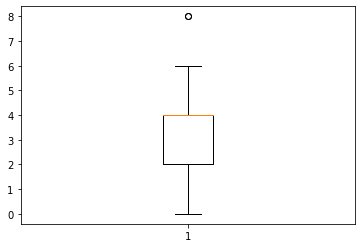

In [159]:
#visualization

#Plotting the boxplot and histogram
plt.boxplot(zoo["legs"])

In [160]:
# there is one outlier in 'legs' variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef101ec8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef101ecfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef101ec5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef101f66a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef101f6a30>],
 'means': []}

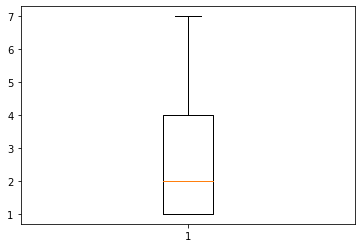

In [161]:
plt.boxplot(zoo["type"])

In [162]:
# AS this is the output variable. As it is discrete,categorical data, analysing is difficult.

(array([23.,  0., 27.,  0.,  0., 38.,  1., 10.,  0.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

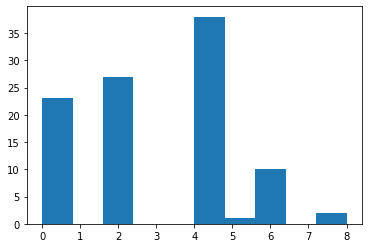

In [163]:
plt.hist(zoo["legs"])

In [164]:
#Creating dummy variables for the animal variable 

In [165]:
dummy = pd.get_dummies(zoo["animalname"], drop_first = True)

In [166]:
zoo = pd.concat([zoo,dummy],axis=1)

In [167]:
zoo = zoo.drop(["animalname"],axis=1)

In [168]:
zoo["legs"].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [169]:
zoo["legs"],_=pd.factorize(zoo["legs"])

In [170]:
labels = zoo.iloc[:,16]

In [171]:
features = zoo.drop(["type"],axis=1)

In [172]:
#Normalizing the equation

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [173]:
data = norm_func(features)

In [174]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2, stratify=labels)

In [175]:
from sklearn.neighbors import KNeighborsClassifier as KN

In [176]:
model1 =KN(n_neighbors=5)
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [177]:
#Accuracy on the train data
train_acc = np.mean((model1.predict(x_train)==y_train))
train_acc

0.975

In [180]:
# accuracy = 97.5%

In [181]:
#Accuracy on test data
test_acc = np.mean(model1.predict(x_test)==y_test)
test_acc

0.9523809523809523

In [182]:
# accuracy = 95%

In [183]:
#Trying for k=7

model2 = KN(n_neighbors=7)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [184]:
#Accuracy on the train data
train2_acc = np.mean((model2.predict(x_train)==y_train))
train2_acc

0.9125

In [189]:
# accuracy = 91%

In [190]:
#Accuracy on test data
test2_acc = np.mean(model2.predict(x_test)==y_test)
test2_acc

0.9047619047619048

In [191]:
# accuracy = 90%

In [192]:
#Creating an empty list
acc=[]

In [193]:
#running KNN algorithm for 7 to 50 nearest neighbours and storing the accuracy values 

In [194]:
for i in range(7,50,2):
    model2=KN(n_neighbors = i)
    model2.fit(x_train,y_train)
    train_acc = np.mean(model2.predict(x_train)==y_train)
    test_acc = np.mean(model2.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

In [195]:
import matplotlib.pyplot as plt

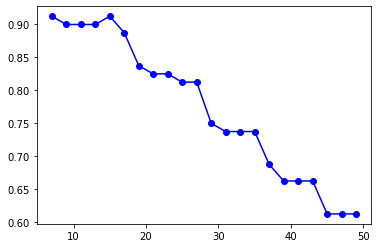

In [196]:
#training accuracy plot
plt.plot(np.arange(7,50,2),[i[0] for i in acc],"bo-")

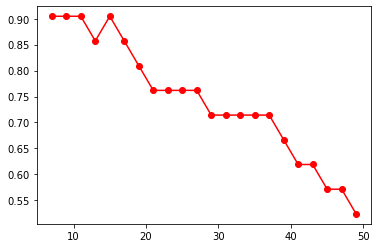

In [197]:
#test accuracy plot
plt.plot(np.arange(7,50,2),[i[1] for i in acc],"ro-")    